# This is File Iteration Processor

In [ ]:
import numpy as np
import pandas as pd
import sys, os

filename = 'E:\dfdc_train_all\metadata.csv'
df = pd.read_csv(filename, dtype={'name':str, 'label':str})
df_obj = df['name']
#print(df_obj)
df['name'] = df_obj.apply(lambda x: x[:-4])
df = df.set_index('name')
#print(df)
#print(df.index.get_loc('aalhdlexwx'))

df.at['aalhdlexwx','label']

for root, dirs, files in os.walk('E:\Train_dataset\dfdc_train_part_00_3d'):
    for name in files:
        if name.endswith("_kpt.txt"):
            print(name)
            data = np.loadtxt(root + '\\' + name)
            #print(data)
            print(root.rsplit('\\', 1)[-1])


# CNN

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
for root, dirs, files in os.walk('E:\\blur_model\\dfdc_train_face_clean'):
    print(root)
    for name in files:
        print(name)
        if name.endswith(".jpg"):
            #Load numpy from text file
            #data = np.loadtxt(root + '\\' + name)
            #print(data)
            rootname = root.rsplit('\\', 1)[-1]
            filename = root + '\\' + name
            img = cv.imread(filename,0)
            dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
            dft_shift = np.fft.fftshift(dft)
            magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
            mkfolder('E:\\blur_model\\dfdc_train_fft\\' + rootname)
            status = cv.imwrite('E:\\blur_model\\dfdc_train_fft\\' + rootname + '\\' + name ,magnitude_spectrum)
            print(status)

In [1]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

#dtype='float16'
#K.set_floatx(dtype)

# default is 1e-7 which is too small for float16.  Without adjusting the epsilon, we will get NaN predictions because of divide by zero problems
#K.set_epsilon(1e-4) 

# dimensions of our images.
img_width, img_height = 300, 300

train_data_dir = 'E:\\blur_model\\dataset\\train\\'
validation_data_dir = 'E:\\blur_model\\dataset\\test\\'
nb_train_samples = 40
nb_validation_samples = 10
epochs = 50
batch_size = 1

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

In [2]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(type(train_generator))

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(type(validation_generator))

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

#model.save_weights('first_try.h5')


Found 44 images belonging to 2 classes.
<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>
Found 11 images belonging to 1 classes.
<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>
Epoch 1/50
40/40 [==============================] - 3s 63ms/step - loss: 0.7772 - accuracy: 0.3250 - val_loss: 0.6959 - val_accuracy: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 1s 32ms/step - loss: 0.7650 - accuracy: 0.5000 - val_loss: 0.6532 - val_accuracy: 1.0000
Epoch 3/50
40/40 [==============================] - 1s 31ms/step - loss: 0.7171 - accuracy: 0.5500 - val_loss: 0.6674 - val_accuracy: 1.0000
Epoch 4/50
40/40 [==============================] - 1s 32ms/step - loss: 0.6973 - accuracy: 0.4000 - val_loss: 0.6837 - val_accuracy: 1.0000
Epoch 5/50
40/40 [==============================] - 1s 31ms/step - loss: 0.6972 - accuracy: 0.4750 - val_loss: 0.6849 - val_accuracy: 1.0000
Epoch 6/50
40/40 [==============================] - 1s 32ms/step 

In [6]:
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size, workers=12)
print(scores)
correct = 0
for i, n in enumerate(validation_generator.filenames):
    if i == 10:
        break
    print(n)
    print(scores[i][0])

print("Correct:", correct, " Total: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

[[0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]
 [0.49976468]]
fake\aaagqkcdis_00001f1.jpg
0.49976468
fake\aaagqkcdis_00030f1.jpg
0.49976468
fake\aaagqkcdis_00059f1.jpg
0.49976468
fake\aaagqkcdis_00088f1.jpg
0.49976468
fake\aaagqkcdis_00117f1.jpg
0.49976468
fake\aaagqkcdis_00146f1.jpg
0.49976468
fake\aaagqkcdis_00175f1.jpg
0.49976468
fake\aaagqkcdis_00204f1.jpg
0.49976468
fake\aaagqkcdis_00233f1.jpg
0.49976468
fake\aaagqkcdis_00262f1.jpg
0.49976468
Correct: 0  Total:  11
Loss:  0.6926764249801636 Accuracy:  1.0


In [10]:
import numpy as np
from PIL import Image

src = np.array(Image.open('C:\\Users\\xalanaseon\\Pictures\\Chi-Wei (2).jpg'))
mask = np.array(Image.open('C:\\Users\\xalanaseon\\Pictures\\mask.jpg').resize(src.shape[1::-1], Image.BILINEAR))

print(mask.dtype, mask.min(), mask.max())
# uint8 0 255

mask = mask / 255

print(mask.dtype, mask.min(), mask.max())
# float64 0.0 1.0

dst = src * mask

Image.fromarray(dst.astype(np.uint8)).save('C:\\Users\\xalanaseon\\Pictures\\with_mask.jpg')

uint8 0 255
float64 0.0 1.0


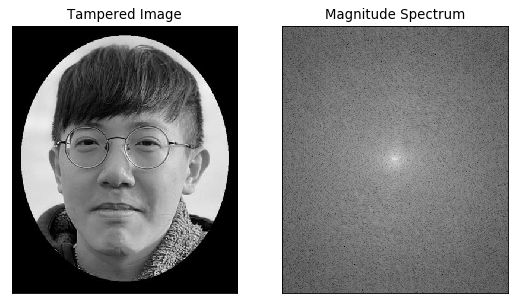

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

img = cv.imread('C:\\Users\\xalanaseon\\Pictures\\with_mask.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Tampered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
img = cv.imwrite('C:\\Users\\xalanaseon\\Pictures\\real_mag.jpg',magnitude_spectrum)
plt.show()